In [2]:
!pip install geopandas

In [3]:
!pip install geodatasets

In [6]:
import geopandas as gpd
from geodatasets import get_path

# Use get_path directly from geodatasets package
path_to_data = get_path("nybb")
gdf = gpd.read_file(path_to_data)

gdf

Output hidden; open in https://colab.research.google.com to view.

In [7]:
gdf.to_file("my_file.geojson", driver="GeoJSON")

In [8]:
gdf = gdf.set_index("BoroName")

In [9]:
gdf["area"] = gdf.area
gdf["area"]

,area
BoroName,
Staten Island,1.623822e+09
Queens,3.045214e+09
Brooklyn,1.937478e+09
Manhattan,6.364712e+08
Bronx,1.186926e+09


In [13]:
print(gdf["area"].max())
print(gdf["area"].min())
print(gdf["area"].mode())

3045213694.323353
636471237.966868
0    6.364712e+08
1    1.186926e+09
2    1.623822e+09
3    1.937478e+09
4    3.045214e+09
Name: area, dtype: float64


In [14]:
gdf["boundary"]=gdf.boundary
gdf["boundary"]

,boundary
BoroName,
Staten Island,"MULTILINESTRING ((970217.022 145643.332, 97022..."
Queens,"MULTILINESTRING ((1029606.077 156073.814, 1029..."
Brooklyn,"MULTILINESTRING ((1021176.479 151374.797, 1021..."
Manhattan,"MULTILINESTRING ((981219.056 188655.316, 98094..."
Bronx,"MULTILINESTRING ((1012821.806 229228.265, 1012..."


In [15]:
gdf["centroid"]=gdf.centroid
gdf["centroid"]

,centroid
BoroName,
Staten Island,POINT (941639.45 150931.991)
Queens,POINT (1034578.078 197116.604)
Brooklyn,POINT (998769.115 174169.761)
Manhattan,POINT (993336.965 222451.437)
Bronx,POINT (1021174.79 249937.98)


In [16]:
first_point = gdf['centroid'].iloc[0]
gdf["distance"]=gdf["centroid"].distance(first_point)
gdf["distance"]

,distance
BoroName,
Staten Island,0.000000
Queens,103781.535276
Brooklyn,61674.893421
Manhattan,88247.742789
Bronx,126996.283623


In [17]:
gdf['distance'].mean()

np.float64(76140.09102166798)

<Axes: >

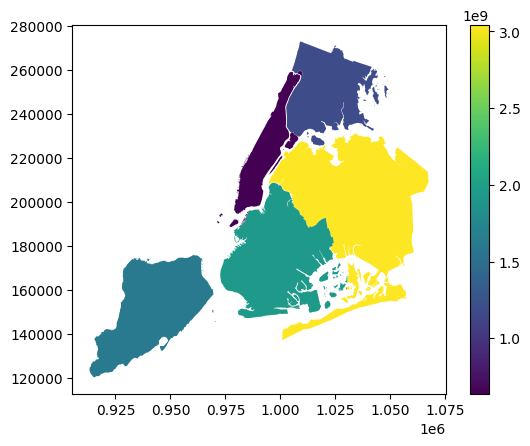

In [18]:
gdf.plot("area", legend=True)

In [19]:
!pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00


<Axes: >

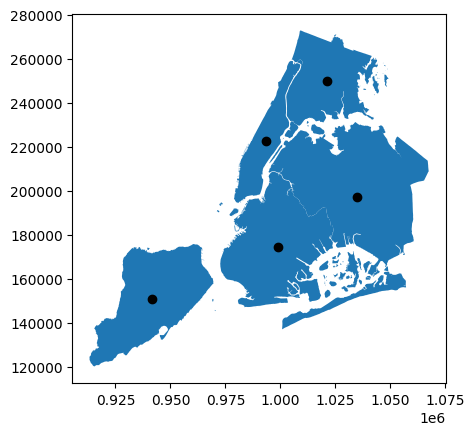

In [20]:
ax=gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")